In [35]:
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
# %matplotlib nbagg

In [38]:
"""
Aruco camera calibration
"""

# Import required packages:
import time
import cv2
import numpy as np
import pickle

# Create dictionary and board object:
rows, cols = 4, 4
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_7X7_250)
board = cv2.aruco.CharucoBoard_create(rows, cols, .025, .0125, dictionary)

# Create board image to be used in the calibration process:
image_board = board.draw((200 * rows, 200 * cols))

# Write calibration board image:
cv2.imwrite('./charuco_boards/charuco_{}x{}.png'.format(rows, cols), image_board)

True

In [43]:
img_dir = os.path.abspath('../../../charuco_images3')
img_file = img_dir + '/IMG_0179.png'
image = cv2.imread(img_file, cv2.IMREAD_COLOR)
print(image.shape)
# aruco_dict = aruco.Dictionary_get(aruco.DICT_5X5_50)
aruco_dict = dictionary
print(aruco_dict)
print(aruco_dict.markerSize)
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(image, aruco_dict)
print(len(corners), len(ids))
print(corners[0])
# print(ids)

(3024, 4032, 3)
<aruco_Dictionary 0x7fecea7e4790>
7
8 8
[[[2184. 2634.]
  [2192. 2304.]
  [2526. 2311.]
  [2518. 2641.]]]


(15, 1, 4, 2)
(60, 2)


True

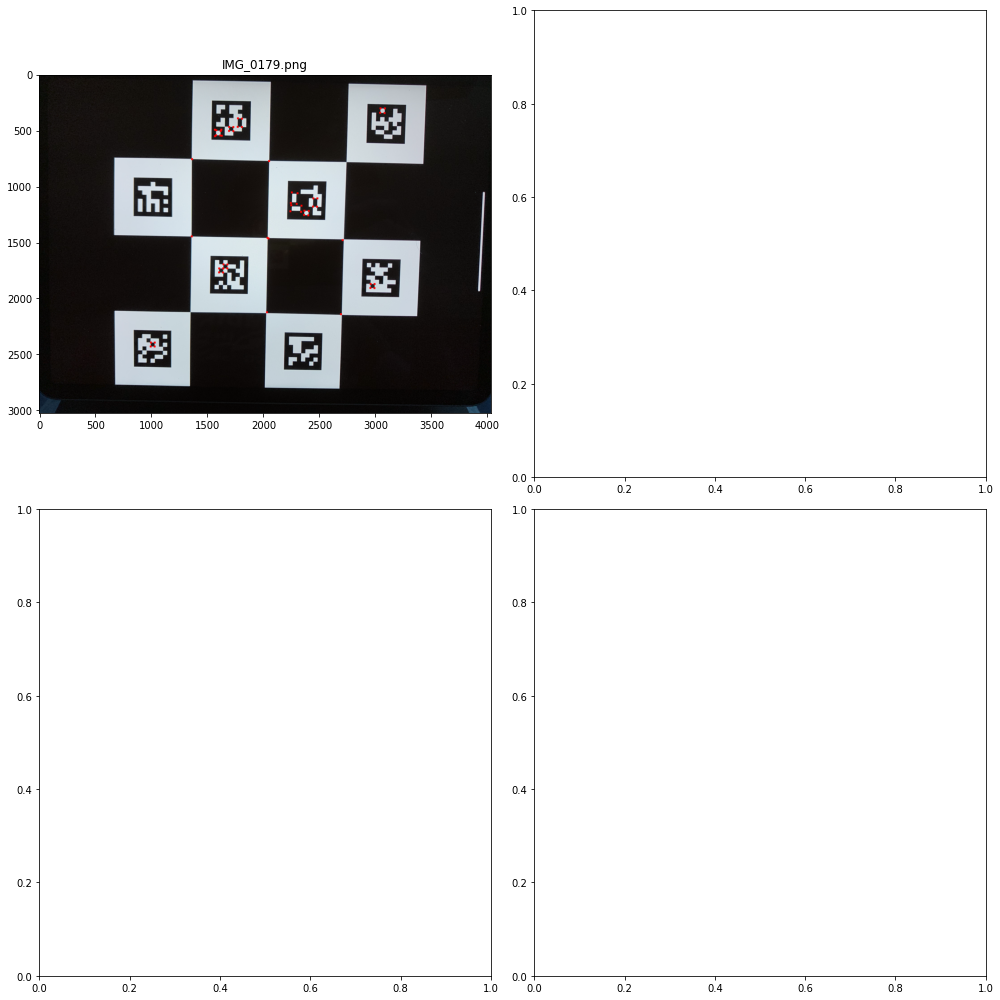

In [44]:
import matplotlib.pyplot as plt
rows = 2
cols = 2
size = 7
fig = plt.figure(tight_layout=True,figsize=(size*cols, size*rows))
ax = fig.subplots(nrows = rows, ncols = cols)
img_path = img_file
# img_points = rejectedImgPoints
rad = 8
# for i, img_path in enumerate(img_paths):
# ri, ci = i // rows, i % cols
ri, ci = 0, 0
# print((ri, ci))
img = cv2.imread(img_path)
points = np.array(rejectedImgPoints)
print(points.shape)
points = points.reshape((-1, 2))
print(points.shape)
# print(points[0].shape)
# indicate corners in the images
for p in points:
    yi, xi = p[0], p[1]
    xi, yi = int(xi), int(yi)
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 1:] = 0 
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 0] = 255
ax[ri, ci].imshow(img)
ax[ri, ci].set_title(os.path.basename(img_path))
cv2.imwrite('charcuo_12_27.png', img)

In [9]:
CHARUCOBOARD_ROWCOUNT = 8
CHARUCOBOARD_COLCOUNT = 11
board = aruco.CharucoBoard_create(CHARUCOBOARD_ROWCOUNT, CHARUCOBOARD_COLCOUNT, 1, 0.8, aruco_dict)
imboard = board.draw((4000, 4000))
print(imboard.shape)
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
ax[0, 0].imshow(imboard)
# ax.imshow(imboard, cmap = mpl.cm.gray, interpolation = "nearest")
# ax.axis("off")
cv2.imwrite("output_dir/chessboard.png",imboard)
#plt.savefig(imagesFolder + "/chessboard.pdf")
# plt.grid()
# plt.show()
bcorners, bids, brejectedImgPoints = cv2.aruco.detectMarkers(imboard, aruco_dict)
print(len(bcorners), len(bids))
points = np.array(rejectedImgPoints)
points = points.reshape((-1, 2))
print(points.shape)
img = imboard
print(imboard.shape)
# print(points[0].shape)
# indicate corners in the images
img = np.stack([img, img, img], axis = -1)
for p in points:
    yi, xi = p[0], p[1]
    xi, yi = int(xi), int(yi)
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 1:] = 0 
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 0] = 255
ax[ri, ci].imshow(img)
ax[ri, ci].set_title(os.path.basename(img_path))
cv2.imwrite('bcharcuo_12_27.png', img)

(4000, 4000)
17 17
(252, 2)
(4000, 4000)


True

In [26]:
# System information:
# - Linux Mint 18.1 Cinnamon 64-bit
# - Python 2.7 with OpenCV 3.2.0

import numpy
import cv2
from cv2 import aruco
import pickle
import glob

# ChAruco board variables
CHARUCOBOARD_ROWCOUNT = 8
CHARUCOBOARD_COLCOUNT = 11
# ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_5X5_50)
ARUCO_DICT = aruco.Dictionary_get(aruco.DICT_7X7_250)

# Create constants to be passed into OpenCV and Aruco methods
CHARUCO_BOARD = aruco.CharucoBoard_create(
        squaresX=CHARUCOBOARD_COLCOUNT,
        squaresY=CHARUCOBOARD_ROWCOUNT,
        squareLength=0.025,
        markerLength=0.0125,
        dictionary=ARUCO_DICT)

# Create the arrays and variables we'll use to store info like corners and IDs from images processed
corners_all = [] # Corners discovered in all images processed
ids_all = [] # Aruco ids corresponding to corners discovered
image_size = None # Determined at runtime

# This requires a set of images or a video taken with the camera you want to calibrate
# I'm using a set of images taken with the camera with the naming convention:
# 'camera-pic-of-charucoboard-<NUMBER>.jpg'
# All images used should be the same size, which if taken with the same camera shouldn't be a problem
# images = glob.glob('./camera-pic-of-charucoboard-*.jpg')
img_dir = os.path.abspath('../../../charuco_images2/')
images = glob.glob(img_dir + '/*.png')
print(len(images))
print(CHARUCO_BOARD)
board_corners = CHARUCO_BOARD.chessboardCorners
print(board_corners.shape, board_corners[0])

13
<aruco_CharucoBoard 0x7fecea7e4690>
(70, 3) [0.025 0.025 0.   ]


In [27]:
# Loop through images glob'ed
for iname in images:
    # Open the image
    img = cv2.imread(iname)
    # Grayscale the image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find aruco markers in the query image
    corners, ids, _ = aruco.detectMarkers(
            image=gray,
            dictionary=ARUCO_DICT)

    # Outline the aruco markers found in our query image
    img = aruco.drawDetectedMarkers(
            image=img, 
            corners=corners)

    # Get charuco corners and ids from detected aruco markers
    response, charuco_corners, charuco_ids = aruco.interpolateCornersCharuco(
            markerCorners=corners,
            markerIds=ids,
            image=gray,
            board=CHARUCO_BOARD)
    print(len(charuco_corners))

    # If a Charuco board was found, let's collect image/corner points
    # Requiring at least 20 squares
    if response > 20:
        # Add these corners and ids to our calibration arrays
        corners_all.append(charuco_corners)
        ids_all.append(charuco_ids)
        
        # Draw the Charuco board we've detected to show our calibrator the board was properly detected
        img = aruco.drawDetectedCornersCharuco(
                image=img,
                charucoCorners=charuco_corners,
                charucoIds=charuco_ids)
       
        # If our image size is unknown, set it now
        if not image_size:
            image_size = gray.shape[::-1]
    
        # Reproportion the image, maxing width or height at 1000
        #proportion = max(img.shape) / 1000.0
        #img = cv2.resize(img, (int(img.shape[1]/proportion), int(img.shape[0]/proportion)))
        # Pause to display each image, waiting for key press
        cv2.imshow('Charuco board', img)
        cv2.waitKey(0)
    else:
        print("Not able to detect a charuco board in image: {}".format(iname))

# Destroy any open CV windows
cv2.destroyAllWindows()

# Make sure at least one image was found
if len(images) < 1:
    # Calibration failed because there were no images, warn the user
    print("Calibration was unsuccessful. No images of charucoboards were found. Add images of charucoboards and use or alter the naming conventions used in this file.")
    # Exit for failure
    exit()

# Make sure we were able to calibrate on at least one charucoboard by checking
# if we ever determined the image size
if not image_size:
    # Calibration failed because we didn't see any charucoboards of the PatternSize used
    print("Calibration was unsuccessful. We couldn't detect charucoboards in any of the images supplied. Try changing the patternSize passed into Charucoboard_create(), or try different pictures of charucoboards.")
    # Exit for failure
    exit()

# Now that we've seen all of our images, perform the camera calibration
# based on the set of points we've discovered
calibration, cameraMatrix, distCoeffs, rvecs, tvecs = aruco.calibrateCameraCharuco(
        charucoCorners=corners_all,
        charucoIds=ids_all,
        board=CHARUCO_BOARD,
        imageSize=image_size,
        cameraMatrix=None,
        distCoeffs=None)

# Print matrix and distortion coefficient to the console
print(cameraMatrix)
print(distCoeffs)
    
# Save values to be used where matrix+dist is required, for instance for posture estimation
# I save files in a pickle file, but you can use yaml or whatever works for you
f = open('calibration.pckl', 'wb')
pickle.dump((cameraMatrix, distCoeffs, rvecs, tvecs), f)
f.close()

# Print to console our success
print('Calibration successful. Calibration file used: {}'.format('calibration.pckl'))

70
70
70
68
70
70
70
70
70
70
70
70
7
Not able to detect a charuco board in image: /Users/shenghuahe/Desktop/paii/3d_recon/calibration/charuco_images2/IMG_0178.png
[[5.67637327e+04 0.00000000e+00 3.74501624e+03]
 [0.00000000e+00 3.41087420e+04 1.29796858e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]
[[-7.50972186e+01  2.63321187e+03  1.06403408e+00 -3.58753144e+00
   5.92751785e+01]]
Calibration successful. Calibration file used: calibration.pckl


In [46]:
print(len(corners_all[8]))

52


In [34]:
objpoints = CHARUCO_BOARD.objPoints
print(len(objpoints))
print(len(rvecs))

44
12


In [32]:
mean_error = 0
objpoints 
for i in range(len(objpoints)):
    # print(objpoints[i])
    # print(len(objpoints))
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], cameraMatrix, distCoeffs)
    print(len(imgpoints2))

    # error = cv2.norm(imgpoints[i], imgpoints2, cv.NORM_L2)/len(imgpoints2)
    # mean_error += error
# print( "total error: {}".format(mean_error/len(objpoints)) )

44
4
44
4
44
4
44
4
44
4
44
4
44
4
44
4
44
4
44
4
44
4
44
4
44


IndexError: tuple index out of range

In [92]:
def read_chessboards(images):
    """
    Charuco base pose estimation.
    """
    print("POSE ESTIMATION STARTS:")
    allCorners = []
    allIds = []
    decimator = 0
    aruco_dict = aruco.Dictionary_get(aruco.DICT_5X5_50)

    for im in images:
        print("=> Processing image {0}".format(im))
        frame = cv2.imread(im)
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        res = cv2.aruco.detectMarkers(gray, aruco_dict)

        if len(res[0])>0:
            res2 = cv2.aruco.interpolateCornersCharuco(res[0],res[1],gray,board)
            if res2[1] is not None and res2[2] is not None and len(res2[1])>3 and decimator%1==0:
                allCorners.append(res2[1])
                allIds.append(res2[2])

        decimator+=1

    imsize = gray.shape
    return allCorners,allIds,imsize
    print("finished")

In [93]:
imagesFolder = img_dir
images = [imagesFolder + '/' + f for f in os.listdir(imagesFolder) if f.endswith(".png")]
allCorners,allIds,imsize=read_chessboards(images)

POSE ESTIMATION STARTS:
=> Processing image /Users/shenghuahe/Desktop/paii/3d_recon/calibration/charcuo_images/IMG_0028.png


error: OpenCV(4.5.4) :-1: error: (-5:Bad argument) in function 'interpolateCornersCharuco'
> Overload resolution failed:
>  - Expected Ptr<cv::aruco::CharucoBoard> for argument 'board'
>  - Expected Ptr<cv::aruco::CharucoBoard> for argument 'board'


In [25]:
import matplotlib.pyplot as plt

rows = 2
cols = 2
size = 7
fig = plt.figure(tight_layout=True,figsize=(size*cols, size*rows))
ax = fig.subplots(nrows = rows, ncols = cols)
img_points = corners
img = image
print(img.shape)
rad = 8
# points = corners[i].squeeze()
point_arr = np.array(corners)
point_arr = point_arr.squeeze()
print(point_arr.shape)
point_arr = point_arr.reshape(-1, 2)
print(point_arr.shape)

<IPython.core.display.Javascript object>

(4032, 3024, 3)
(44, 4, 2)
(176, 2)


In [23]:
# indicate corners in the images
for i in range(point_arr.shape[0]):
    p = point_arr[i]
    yi, xi = p[0], p[1]
    xi, yi = int(xi), int(yi)
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 1:] = 0 
    img[xi - rad: xi + rad + 1, yi - rad: yi + rad + 1, 0] = 255
ax[0,0].imshow(img)
ax[0,0].set_title(os.path.basename(img_file))
cv2.imwrite('charcuo_res.png', img)

True

In [44]:
import numpy as np
import cv2, PIL, os
from cv2 import aruco
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
%matplotlib nbagg

In [69]:
import numpy as np
import cv2
import cv2.aruco as aruco
import pathlib


def calibrate_aruco(dirpath, image_format, marker_length, marker_separation):
    '''Apply camera calibration using aruco.
    The dimensions are in cm.
    '''
    aruco_dict = aruco.Dictionary_get(aruco.DICT_5x5_50)
    arucoParams = aruco.DetectorParameters_create()
    board = aruco.GridBoard_create(8, 11, marker_length, marker_separation, aruco_dict)

    counter, corners_list, id_list = [], [], []
    img_dir = pathlib.Path(dirpath)
    first = 0
    # Find the ArUco markers inside each image
    for img in img_dir.glob(f'*.{image_format}'):
        image = cv2.imread(str(img))
        img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        corners, ids, rejected = aruco.detectMarkers(
            img_gray, 
            aruco_dict, 
            parameters=arucoParams
        )

        if first == 0:
            corners_list = corners
            id_list = ids
        else:
            corners_list = np.vstack((corners_list, corners))
            id_list = np.vstack((id_list,ids))
        first = first + 1
        counter.append(len(ids))

    counter = np.array(counter)
    # Actual calibration
    ret, mtx, dist, rvecs, tvecs = aruco.calibrateCameraAruco(
        corners_list, 
        id_list,
        counter, 
        board, 
        img_gray.shape, 
        None, 
        None 
    )
    return [ret, mtx, dist, rvecs, tvecs]